<a href="https://colab.research.google.com/github/evegat/usm2025-1-dip-ia-edu-v2-evegat/blob/main/Proyecto/03analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito 2: Análisis exploratorio del dataset y preprocesamiento


# Analisis Exploratorio
En este notebook se realiza un análisis exploratorio de los datos para conocer a cabalidad su contenido. Se consideran estadísticas descriptivas, revisión de nulos, distribución de datos y visualización mediante gráficos. Esto permitirá identificar patrones, anomalías o relaciones que orienten decisiones para los siguientes pasos del proyecto.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset limpio desde GitHub
url = 'https://github.com/evegat/usm2025-1-dip-ia-edu-v2-evegat/raw/main/Proyecto/01database.csv.gz'
df = pd.read_csv(url, compression='gzip')

print(f" Dataset cargado: {df.shape[0]:,} filas, {df.shape[1]} columnas")


 Dataset cargado: 1,521,923 filas, 17 columnas


## Estadísticas generales del dataset

Se explora la cantidad de filas, columnas, tipos de datos y se describen numéricamente las variables.


In [13]:
df.head()


,cat_periodo,gen_alu,rango_edad,anio_ing_carr_act,tipo_inst_1,modalidad,jornada,region_sede,nivel_carrera_1,requisito_ingreso,valor_matricula,valor_arancel,acreditada_carr,acreditada_inst,forma_ingreso,AGNO_ORIGEN,nomb_carrera
0,2023,1,15 a 19 años,2023,Universidades,Presencial,Diurno,Arica y Parinacota,Profesional Con Licenciatura,Educación Media,188000.0,3519000.0,ACREDITADA,ACREDITADA,1- Ingreso Directo (regular),2023,PEDAGOGIA EN HISTORIA Y GEOGRAFIA
1,2024,2,30 a 34 años,2024,Universidades,Presencial,Vespertino,Biobío,Profesional Con Licenciatura,Técnico de Nivel Superior,126000.0,2753000.0,NO ACREDITADA,ACREDITADA,1- Ingreso Directo (regular),2024,CONTADOR PUBLICO Y AUDITOR
2,2024,1,20 a 24 años,2019,Universidades,Presencial,Diurno,Coquimbo,Profesional Con Licenciatura,Educación Media,209100.0,3928000.0,NO ACREDITADA,ACREDITADA,1- Ingreso Directo (regular),2024,INGENIERIA CIVIL DE MINAS
3,2023,1,40 y más años,2022,Institutos Profesionales,No Presencial,A Distancia,Metropolitana,Profesional Sin Licenciatura,Educación Media,100000.0,1990000.0,NO ACREDITADA,ACREDITADA,1- Ingreso Directo (regular),2023,INGENIERIA INDUSTRIAL
4,2023,1,15 a 19 años,2023,Institutos Profesionales,Presencial,Diurno,Biobío,Profesional Sin Licenciatura,Educación Media,258000.0,2710000.0,NO ACREDITADA,ACREDITADA,1- Ingreso Directo (regular),2023,RELACIONES PUBLICAS MENCION MARKETING


In [14]:
print("Tamaño del dataset (filas, columnas):", df.shape)
df.info()


Tamaño del dataset (filas, columnas): (1521923, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521923 entries, 0 to 1521922
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cat_periodo        1521923 non-null  int64  
 1   gen_alu            1521923 non-null  int64  
 2   rango_edad         1521923 non-null  object 
 3   anio_ing_carr_act  1521923 non-null  int64  
 4   tipo_inst_1        1521923 non-null  object 
 5   modalidad          1521923 non-null  object 
 6   jornada            1521923 non-null  object 
 7   region_sede        1521923 non-null  object 
 8   nivel_carrera_1    1521923 non-null  object 
 9   requisito_ingreso  1521923 non-null  object 
 10  valor_matricula    1521902 non-null  float64
 11  valor_arancel      1521902 non-null  float64
 12  acreditada_carr    1521923 non-null  object 
 13  acreditada_inst    1521923 non-null  object 
 14  forma_ingreso      1521923 non

In [15]:
df.describe()


,cat_periodo,gen_alu,anio_ing_carr_act,valor_matricula,valor_arancel,AGNO_ORIGEN
count,1.521923e+06,1.521923e+06,1.521923e+06,1.521902e+06,1.521902e+06,1.521923e+06
mean,2.023509e+03,1.522258e+00,2.021513e+03,2.420944e+05,4.184945e+06,2.023509e+03
std,4.999268e-01,4.995045e-01,2.071217e+00,1.461310e+05,1.896468e+06,4.999268e-01
min,2.023000e+03,1.000000e+00,1.987000e+03,0.000000e+00,0.000000e+00,2.023000e+03
25%,2.023000e+03,1.000000e+00,2.020000e+03,1.675000e+05,2.850000e+06,2.023000e+03
50%,2.024000e+03,2.000000e+00,2.022000e+03,2.080000e+05,4.105200e+06,2.024000e+03
75%,2.024000e+03,2.000000e+00,2.023000e+03,2.820000e+05,5.479000e+06,2.024000e+03
max,2.024000e+03,2.000000e+00,2.024000e+03,1.059000e+06,1.060830e+07,2.024000e+03


In [16]:
df.isnull().sum()


,0
cat_periodo,0
gen_alu,0
rango_edad,0
anio_ing_carr_act,0
tipo_inst_1,0
modalidad,0
jornada,0
region_sede,0
nivel_carrera_1,0
requisito_ingreso,0


In [17]:
(df.isnull().sum() * 100 / len(df)).round(2)


,0
cat_periodo,0.0
gen_alu,0.0
rango_edad,0.0
anio_ing_carr_act,0.0
tipo_inst_1,0.0
modalidad,0.0
jornada,0.0
region_sede,0.0
nivel_carrera_1,0.0
requisito_ingreso,0.0


In [18]:
df.mode().iloc[0]


,0
cat_periodo,2024
gen_alu,2
rango_edad,20 a 24 años
anio_ing_carr_act,2023
tipo_inst_1,Universidades
modalidad,Presencial
jornada,Diurno
region_sede,Metropolitana
nivel_carrera_1,Profesional Con Licenciatura
requisito_ingreso,Educación Media


## Correlación entre variables numéricas

Se visualizan las relaciones entre las variables numéricas mediante un mapa de calor (heatmap). Esto ayuda a identificar patrones lineales entre columnas.


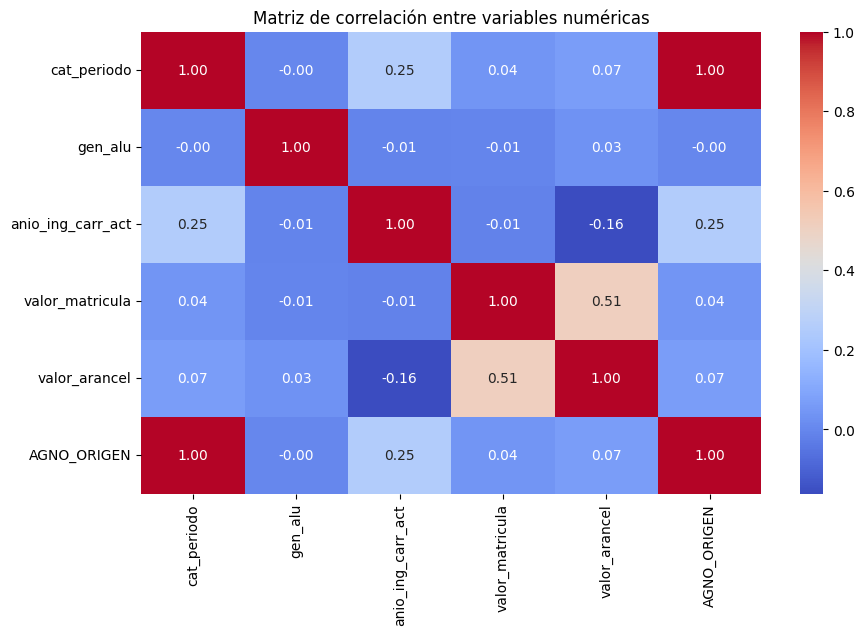

In [19]:
# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Heatmap de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


## Distribución de variables numéricas

Se generan histogramas para visualizar la forma de distribución de las principales variables cuantitativas del dataset.


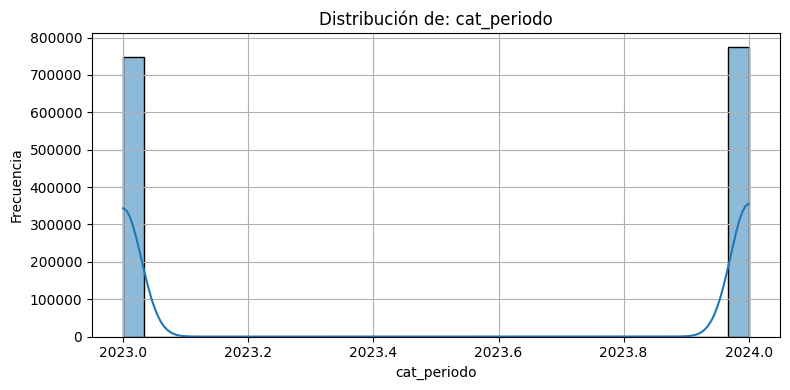

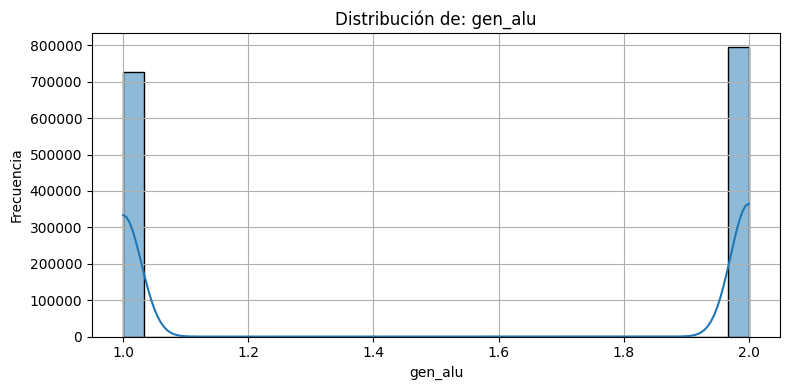

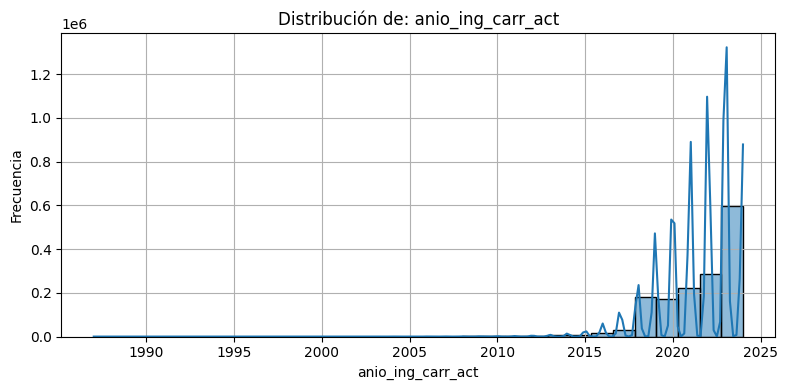

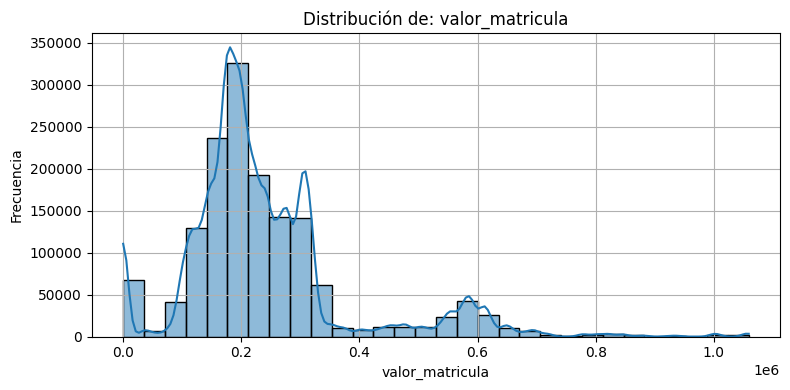

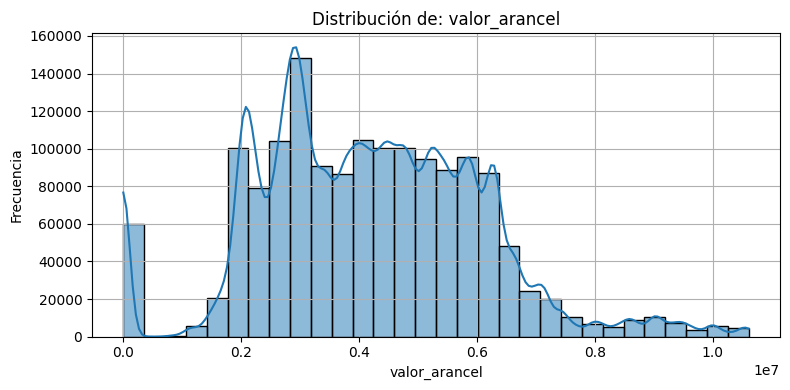

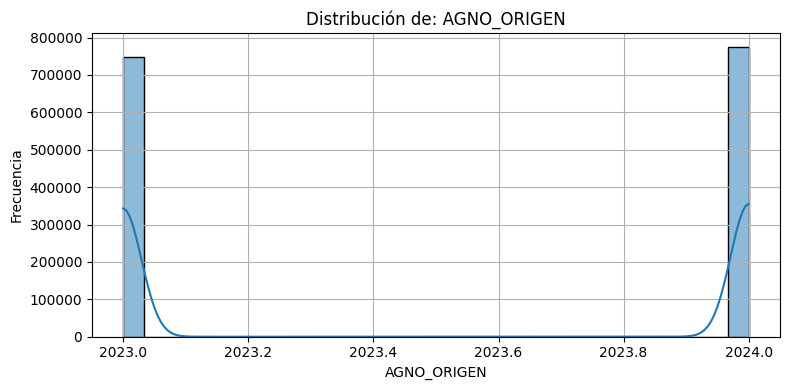

In [20]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Frecuencia de variables categóricas

Se explora la distribución de valores en algunas columnas categóricas de interés.


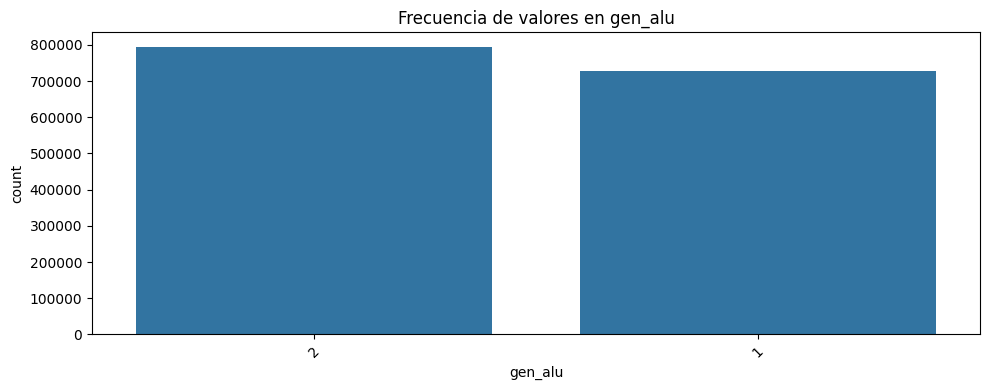

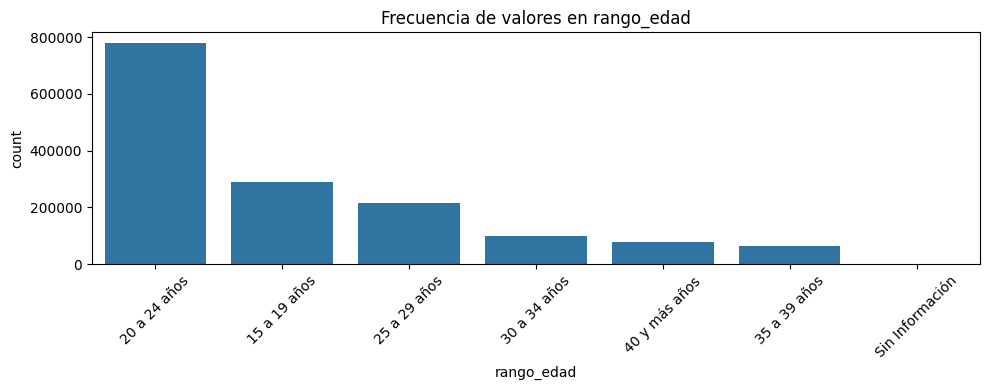

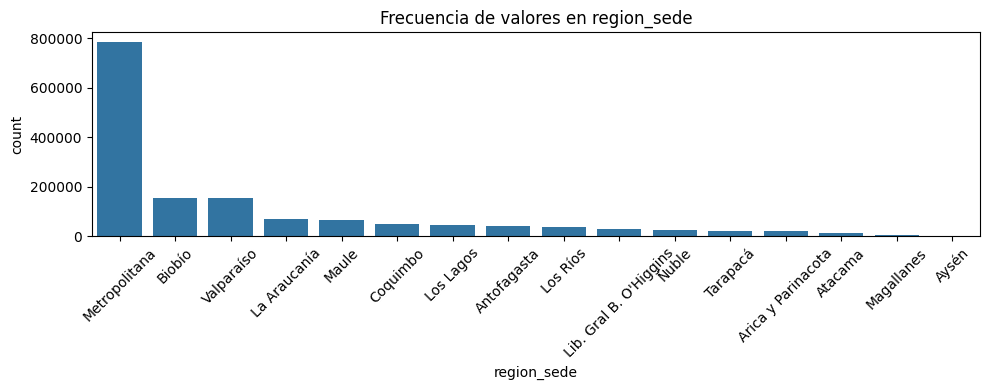

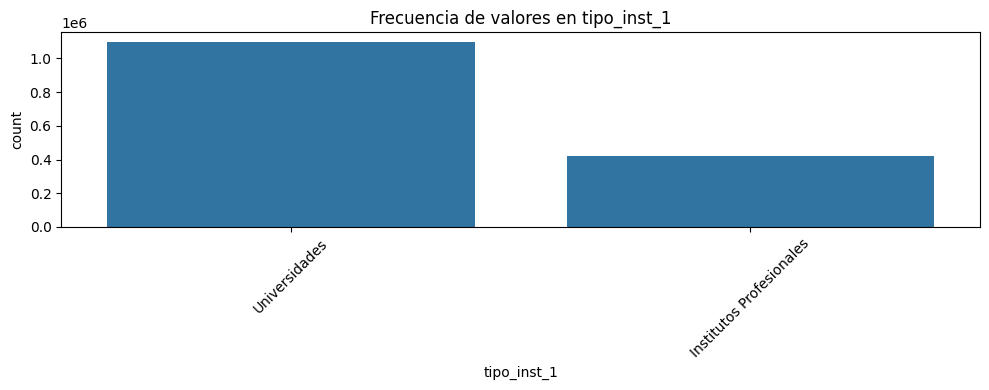

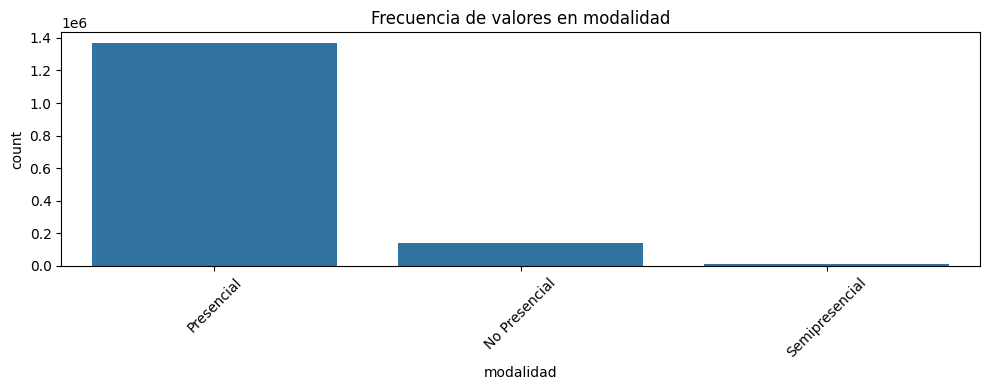

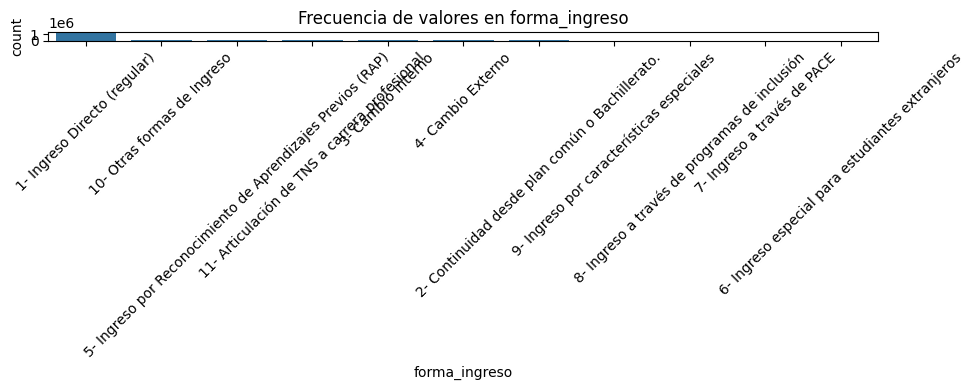

In [21]:
columnas_cat = ['gen_alu', 'rango_edad', 'region_sede', 'tipo_inst_1', 'modalidad', 'forma_ingreso']

for col in columnas_cat:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Frecuencia de valores en {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Conclusión del análisis exploratorio

A través de este análisis inicial, se identificaron características relevantes del dataset como su composición por región, modalidad, tipo de institución y valores típicos por variable. Esta información orientará las decisiones del preprocesamiento y modelado, permitiendo enfocar esfuerzos en las variables más influyentes.

